In [1]:
from PIL import Image
import numpy as np

### chair의 이미지 해상도 통일하여 적용하기 Test

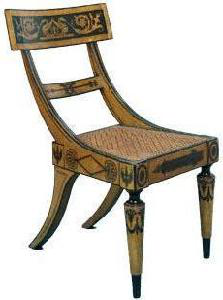

In [2]:
# Image 불러오기
img = Image.open('../Data/cnn/chair/image_0001.jpg')
img

In [3]:
img.width

223

In [4]:
# 배열 확인
np.array(img).shape 
# (300, 223, 3) 세로, 가로, RGB

(300, 223, 3)

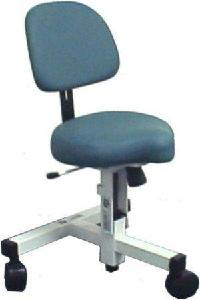

In [5]:
# Image 불러오기
img = Image.open('../Data/cnn/chair/image_0002.jpg')
img

In [6]:
# 배열 확인
np.array(img).shape 
# (300, 200, 3) 세로, 가로, RGB

(300, 200, 3)

In [7]:
# 너비 해상도 구하기
np.array(img).shape[1] 

200

---
### chair 전체 이미지의 해상도 평균 구하기 
(max , min, mean 등 여러 방식으로 해보기)

In [8]:
import glob
# excel 배울떄 했을듯 , 파이썬 장점 활용@@ 

In [9]:
widthRatio = []
heightRatio = []

for file in sorted(glob.glob("../Data/cnn/chair/*.jpg")):
    img = np.array(Image.open(file) , dtype = np.int32 )
    # print(img.shape[1]) # width 확인
    heightRatio.append(img.shape[0])
    widthRatio.append(img.shape[1])

In [10]:
print("chair의 너비 평균 해상도 :" , np.mean(widthRatio))
print("chair의 높이 평균 해상도 :" , np.mean(heightRatio))

print("chair의 너비 평균 해상도 :" , np.max(widthRatio))
print("chair의 높이 평균 해상도 :" , np.max(heightRatio))

chair의 너비 평균 해상도 : 225.26785714285714
chair의 높이 평균 해상도 : 297.89285714285717
chair의 너비 평균 해상도 : 300
chair의 높이 평균 해상도 : 300


In [11]:
# 갯수 확인
print(len(widthRatio) , len(heightRatio))
print(len(widthRatio) == len(heightRatio))

56 56
True


In [12]:
round(widthRatio[17]/2)

97

> 너비 : 231 , 높이 : 297 로 하자

---
### chair의 이미지 해상도 변경 및 Gray Scale로 적용하기

In [13]:
# Chair의 파일갯수(62개)와 laptop의 파일 갯수(81개)를 60개로 맞추기
i = 0 # 이미지 갯수 카운트
for file in sorted(glob.glob("../Data/cnn/chair/*.jpg")):
    img = Image.open(file)
    imgResize = img.resize( (widthRatio[i], heightRatio[i]) , resample = Image.LANCZOS ) # 사이즈는 꼭 튜플로 적어줘야 한다
    # Image.LANCZOS / Image.Resampling.LANCZOS (M1) 이미지 프로세싱 부분 코드
    imgResize = imgResize.convert('L') # Grayscale , 투명도가 있는 경우에는 'LA' 입력
    imgResize.save("../Data/cnn/chairNew/image_%04d.jpg"%i , 'JPEG')
    i+=1
    if i >= 56:
        break

---
# Laptop의 이미지 해상도 변경 및 Grayscale로 적용하기
이미지 크기는 chair과 동일하게 함

In [14]:
widthRatioLap = []
heightRatioLap = []

for file in sorted(glob.glob("../Data/cnn/laptop/*.jpg")):
    img = np.array(Image.open(file) , dtype = np.int32 )
    # print(img.shape[1]) # width 확인
    heightRatioLap.append(img.shape[0])
    widthRatioLap.append(img.shape[1])

In [15]:
# Chair의 파일갯수(62개)와 laptop의 파일 갯수(81개)를 60개로 맞추기
i = 0 # 이미지 갯수 카운트
for file in sorted(glob.glob("../Data/cnn/laptop/*.jpg")):
    img = Image.open(file)
    imgResize = img.resize( (widthRatioLap[i] ,heightRatioLap[i]) , resample = Image.LANCZOS ) # 사이즈는 꼭 튜플로 적어줘야 한다
    # Image.LANCZOS / Image.Resampling.LANCZOS (M1) 이미지 프로세싱 부분 코드
    imgResize = imgResize.convert('L') # Grayscale , 투명도가 있는 경우에는 'LA' 입력
    imgResize.save("../Data/cnn/laptopNew/image_%04d.jpg"%i , 'JPEG')
    i+=1
    if i >= 56:
        break

---
# chair image를 numpy로 변경하기

numpy는 0값으로 이루어진 기본 배열이 있어야 한다.

In [16]:
number_of_data = 56
img_width_size = 400
img_height_size = 400

In [17]:
chairData = np.zeros(number_of_data*img_width_size*img_height_size , dtype = np.int32).reshape(number_of_data ,img_height_size , img_width_size)

In [18]:
chairData.shape # 비어있는 numpy 60장

(56, 400, 400)

In [19]:
import math
i = 0
for file in sorted(glob.glob('../Data/cnn/chairNew/*.jpg')):
    img = Image.open(file)
    imgA = np.array(img , dtype= np.int32)
    chairData[i ,(400 - img.height)//2 : math.trunc(400 - (400 - img.height)/2 )  , (400 - img.width)//2 : math.trunc(400 - (400 - img.width)/2)  ] = imgA
    i += 1

In [20]:
chairData.shape

(56, 400, 400)

In [21]:
# import math
# img = Image.open('../Data/cnn/laptopNew/image_0041.jpg')
# imga = np.array(img , dtype= np.int32)
# imga.shape
# chairData[0 ,round((400 - img.height)/2): math.trunc(400 - (400 - img.height)/2 )  , round((400 - img.width)/2):  math.trunc(400 - (400 - img.width)/2)   ] = imga
# print((400 - img.height)//2 , math.trunc(400 - (400 - img.height)/2 ) )
# print((400 - img.width)//2 , math.trunc(400 - (400 - img.width)/2)  )
# 311-88

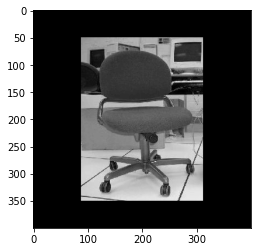

In [22]:
# 이미지 확인하기
import matplotlib.pyplot as plt
plt.imshow(chairData[54].reshape(400,400) , cmap='gray') # imshow 배열을 시각화 해줌
plt.show()

배경이 검은색이든 흰색이든 특징점을 가져오는 것이기 때문에 CNN은 상관없다

---
### laptop image를 numpy로 변경하기

In [23]:
laptopData = np.zeros(number_of_data*img_width_size*img_height_size , dtype = np.int32).reshape(number_of_data ,img_height_size , img_width_size)

In [24]:
laptopData.shape

(56, 400, 400)

In [25]:
i = 0
for file in sorted(glob.glob('../Data/cnn/laptopNew/*.jpg')):
    img = Image.open(file)
    imgA = np.array(img , dtype= np.int32)
    laptopData[i ,(400 - img.height)//2 : math.trunc(400 - (400 - img.height)/2 )  , (400 - img.width)//2 : math.trunc(400 - (400 - img.width)/2)  ] = imgA
    i += 1

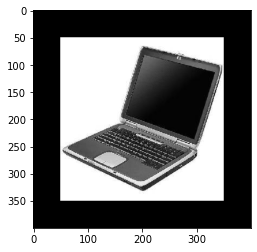

In [26]:
# 이미지 확인하기
import matplotlib.pyplot as plt
plt.imshow(laptopData[0].reshape(400,400) , cmap='gray') # imshow 배열을 시각화 해줌
plt.show()

---
### numpy data 를 train data로 합치기

In [27]:
train = np.concatenate([chairData , laptopData] ) # axis = 0 , 밑으로 붙임
train.shape

(112, 400, 400)

### Target 만들기

In [28]:
target = np.concatenate([np.zeros(56) , np.ones(56)])
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

> 여기까지 작업을 해야 CNN을 사용할 수 있다.

# CNN

정규화, cnn용으로 reshape하기

In [29]:
cnn_data = train.reshape(-1 , 400, 400, 1) / 255.0
cnn_data.shape

(112, 400, 400, 1)

train (train / val) 과 test로 나누기

In [30]:
from sklearn.model_selection import train_test_split
trainData, testData , trainTargetData , testTargetData = train_test_split(
    cnn_data, target, test_size= 0.2 #, random_state= 77
)
trainData, valData , trainTargetData , valTargetData = train_test_split(
    trainData, trainTargetData, test_size= 0.2 #, random_state= 77
)

In [31]:
print(trainData.shape)
print(valData.shape)
print(trainTargetData.shape)
print(valTargetData.shape)

(71, 400, 400, 1)
(18, 400, 400, 1)
(71,)
(18,)


In [32]:
from tensorflow import keras

In [33]:
model = keras.Sequential()

2022-07-21 19:03:56.400810: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


convolved / pooling 

In [34]:
model.add(
    keras.layers.Conv2D(
        64, # filter 갯수
        kernel_size = 3, # kernel size (3,3,1)
        activation = "relu", 
        padding = "same",
        input_shape = (400,400,1) # 제일 처음 등장하는 layer니까 input_shape 설정 해줌
    )
)

In [35]:
model.add(
    keras.layers.MaxPooling2D(2) # 2x2 
) 

In [36]:
# model.add(
#     keras.layers.Conv2D(
#         64, # filter의 갯수
#         kernel_size = 3,
#         activation = "relu",
#         padding = "same",
#     )
# )

In [37]:
# model.add(
#     keras.layers.MaxPooling2D(2) # 2x2 
# )

CNN딥러닝

In [38]:
model.add(keras.layers.Flatten()) # 1차원으로 펼쳐줌
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(0.1))
# model.add(keras.layers.Dense(50, activation="relu"))
# model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(2 , activation = 'sigmoid'))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 400, 400, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 200, 200, 64)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2560000)           0         
                                                                 
 dense (Dense)               (None, 100)               256000100 
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                        

In [53]:
# model compile
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = 'accuracy'
)
checkpoint_cb = keras.callbacks.ModelCheckpoint('../Data/cnn/best_cnn_model_CL.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    trainData , 
    trainTargetData ,
    epochs = 20 ,
    validation_data = (valData , valTargetData) ,
    callbacks = [checkpoint_cb , early_stopping_cb] #  , early_stopping_cb
)

Epoch 1/20
3/3 [==============================] - 68s 26s/step - loss: 4.3148e-06 - accuracy: 1.0000 - val_loss: 1.0993 - val_accuracy: 0.8333
Epoch 2/20
3/3 [==============================] - 67s 27s/step - loss: 1.0601e-05 - accuracy: 1.0000 - val_loss: 0.6358 - val_accuracy: 0.9444
Epoch 3/20
3/3 [==============================] - 96s 40s/step - loss: 2.2849e-06 - accuracy: 1.0000 - val_loss: 0.4825 - val_accuracy: 0.9444
Epoch 4/20
3/3 [==============================] - 75s 26s/step - loss: 6.7160e-09 - accuracy: 1.0000 - val_loss: 0.3186 - val_accuracy: 0.9444
Epoch 5/20
3/3 [==============================] - 73s 29s/step - loss: 0.0139 - accuracy: 0.9859 - val_loss: 8.4956 - val_accuracy: 0.6667
Epoch 6/20
3/3 [==============================] - 80s 34s/step - loss: 0.4319 - accuracy: 0.9577 - val_loss: 3.2258 - val_accuracy: 0.8333
Epoch 7/20
3/3 [==============================] - 62s 25s/step - loss: 9.6204e-07 - accuracy: 1.0000 - val_loss: 1.6114 - val_accuracy: 0.8333
Epoch 8

시각화

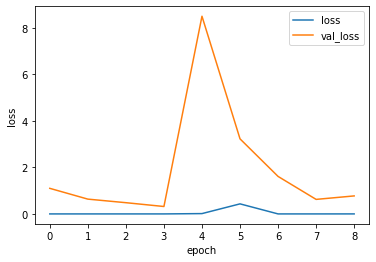

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

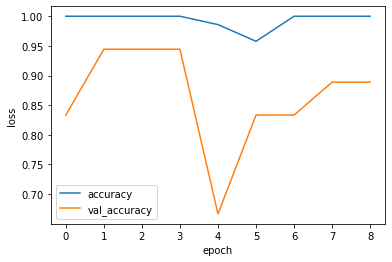

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

검증데이터

In [56]:
model.evaluate(valData , valTargetData)

1/1 [==============================] - 8s 8s/step - loss: 0.3186 - accuracy: 0.9444


[0.3186337649822235, 0.9444444179534912]

테스트 데이터

In [57]:
model.evaluate(testData , testTargetData)

1/1 [==============================] - 1s 715ms/step - loss: 2.3540 - accuracy: 0.7826


[2.35396146774292, 0.782608687877655]

In [45]:
# cnn = keras.models.load_model("../Data/cnn/best_cnn_model_CL.h5" )

In [46]:
# test = Image.open('../Data/cnn/test.jpg') 
# test = test.resize((300,300) , resample = Image.LANCZOS )
# test = np.array(test , dtype=np.int32)
# test = test.reshape(300,300,1) / 255.0
# test1 = np.array(Image.open('../Data/cnn/test01.jpg') , dtype=np.int32)
# test.shape


In [47]:
# cnn.predict(test)